<a href="https://colab.research.google.com/github/hodeaven/DS_CHANLLENGE_INDICIUM_EDUARDA_INTERAMINENSE/blob/main/LH_CD_EDUARDA_INTERAMINENSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lighthouse — Desafio Cientista de Dados 🎲
---

### Introdução

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

**Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema.**







### Entregas



1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!




# Análise Exploratória dos dados

Iremos instalar e configurar o ambiente com o objetivo de atender as condições necessárias e importar bibliotecas fundamentais para a execução deste desafio

In [439]:
# Importando bibliotecas e configurando o ambiente de execução
# Bibliotecas utilizadas para manipulação dos dados
import pandas as pd
import numpy as np

# Biblioteca para importar arquivos do drive
from google.colab import drive

# Plotar histogramar e realizar inspeção visual
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Formatação da saída dos dados
pd.set_option('display.float_format', '{:.2f}'.format)

In [440]:
# Captura dos dados
# Utilização da biblioteca pandas para leitura do arquivo com os dados
drive.mount('/content/drive')
dados = '/content/drive/MyDrive/LIGHTHOUSE/teste_indicium_precificacao.csv'
db = pd.read_csv(dados)
db.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.75,-73.97,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [441]:
# Visualização de todas colunas da base de dados
pd.set_option('display.float_format', '{:.2f}'.format)
db.columns

Index(['id', 'nome', 'host_id', 'host_name', 'bairro_group', 'bairro',
       'latitude', 'longitude', 'room_type', 'price', 'minimo_noites',
       'numero_de_reviews', 'ultima_review', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365'],
      dtype='object')

In [442]:
# Vizualizando quantidade de colunas e linhas
db.shape

(48894, 16)

In [443]:
# Analisando os tipos de dados que contem no arquivo da base de dados
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [444]:
categorical = db.columns[db.dtypes==object].tolist()
total_categorical = len(categorical)
numerical = db.columns[db.dtypes!=object].tolist()
total_numerical = len(numerical)
print('------ Categóricas ------ \n ► Total:', total_categorical,'\n ► Variáveis:', categorical)
print('\n ------ Numerical ------ \n ► Total:', total_numerical,'\n ► Variáveis:', numerical)

------ Categóricas ------ 
 ► Total: 6 
 ► Variáveis: ['nome', 'host_name', 'bairro_group', 'bairro', 'room_type', 'ultima_review']

 ------ Numerical ------ 
 ► Total: 10 
 ► Variáveis: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']


Observando o número total de valores nulos o método info não indica que existe valores nulos em cada coluna do dataframe. No entanto, avistamos alguns dados com valores faltantes anteriormente. Também podemos verificar os tipos de cada variável utilizando a biblioteca pandas no total, 6 variáveis são categóricas e a quantidade restante, 10 é de tipos numéricos. Com base nisso, iremos realizar a análise de dados a seguir para verificar no total a presença de dados faltantes ou corrompidos. Com isso, iremos investigar a quantidade dos valores únicos em cada coluna de tipo categórico.

In [445]:
# Observando a quantidade de valores nulo por cada coluna no dataframe
db.isnull().sum()

,0
id,0
nome,16
host_id,0
host_name,21
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


Diante do método isnull podemos verificar se nas células dos nossos dados existem valores nulos. Caso haja, ele retorna esse valor como verdadeiro. Foi identificado um número razoável de valores nulos, sendo as variáveis com maior ocorrência `ultima_review` e `reviews_por_mês`. Os valores faltantes encontrados nos dados é simbolizado por **NaN** um missing vlaue. Contudo, é necessário tomar uma decisão em relação aos valores faltantes antes de dar continuidade com modelos, pois esse tipo de registro pode prejudicar e alterar os resultados dos modelos

Existem algumas opções para esse caso: eliminar os dados onde os valores faltantes se encontram ou imputar esses valores por um modelo. Cada solução tem seus prós e contras. No entanto, iremos analisar melhor os dados para escolher a opção que melhor se encaixa na necessidade do caso

In [446]:
# Criando resumo estátistica para todas colunas (numéricas e categóricas)
# count: Quantidade de valores não nulos
# unique: Quantidade de valores únicos na coluna
# top: Moda - valor mais frequente
# freq: A quantidade de vezes que a moda aparece
# mean: Média
# std: Desvio padrão
# min: Valor mínimo.
# 25%: Valor abaixo do qual estão 25% dos dados
# 50%: Mediana
# 75%: Valor abaixo do qual estão 75% dos dados
# max: Valor máximo.

db.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.00,48894.00,48894.00,48894.00,48894.00,48894.00,48894.00,38842.00,48894.00,48894.00
mean,19017532.13,67621393.58,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,10982884.05,78611176.15,0.05,0.05,240.16,20.51,44.55,1.68,32.95,131.62
min,2595.00,2438.00,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,9472370.75,7822736.75,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,19677431.50,30795529.00,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,29152249.25,107434423.00,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,36487245.00,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


In [447]:
# Visualizando valores unicos por coluna
valores_unicos = db.nunique()
valores_unicos

,0
id,48894
nome,47904
host_id,37457
host_name,11452
bairro_group,5
bairro,221
latitude,19048
longitude,14718
room_type,3
price,674


In [448]:
# Visualizando a porcentagem dos valores nulos

display((db.isnull().mean() * 100).round(2).apply(lambda x: f"{x}%"))

,0
id,0.0%
nome,0.03%
host_id,0.0%
host_name,0.04%
bairro_group,0.0%
bairro,0.0%
latitude,0.0%
longitude,0.0%
room_type,0.0%
price,0.0%


Com a análise dos valores nulos, podemos observar as variáveis `nome` e `host_name`, possuem dados faltosos no entanto uma quantidade desprezível em relação a todo o dataframe de dados sendo (0.03% e 0.04%) do total do dataframe. Existe a opção de eliminar esses dados pois por ser um valor insignificante não comprometeria a análise. Contudo iremos manter e apenas substituir os missing value das variáveis `nome` e `host_name`. Essa decisão garante que o restante dos dados permaneçam, preservando a intefridade da base sem afetar a modelagem.

In [449]:
# Substituindo valores vazios por 'Desconhecido'
db['nome'] = db['nome'].fillna('Desconhecido')
db['host_name'] = db['host_name'].fillna('Desconhecido')
print(db[['nome', 'host_name']].isnull().sum())

nome         0
host_name    0
dtype: int64


Realizando a conversão da variável `ultima_review` para o formato datetime. A não transformação desse dado pode limitar nossa análise e o nosso modelo futuramente pelo motivo de o pandas trata como string e alterando transformamos em um objeto.

In [450]:
# Preencher valores ausentes em 'reviews_por_mes' com a média
# Se 'numero_de_reviews' for 0, marcar 'ultima_review' como 'Sem Avaliação'
# Converter 'ultima_review' para datetime, com tratamento de erros
# Preencher valores ausentes em 'ultima_review' com a mediana das datas existentes
# Não criamos mais a flag, mas garantimos que 'ultima_review' seja preenchido corretamente


db['reviews_por_mes'].fillna(db['reviews_por_mes'].mean(), inplace=True)
db.loc[db['numero_de_reviews'] == 0, 'ultima_review'] = 'Sem Avaliação'
db['ultima_review'] = pd.to_datetime(db['ultima_review'], errors='coerce')
mediana_review = db['ultima_review'].median()
db['ultima_review'].fillna(mediana_review, inplace=True)



<ipython-input-450-09b5dede1420>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db['reviews_por_mes'].fillna(db['reviews_por_mes'].mean(), inplace=True)
<ipython-input-450-09b5dede1420>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

Ademais, a técnica escolhida para tratar as variáveis `ultima_review` e `review_por_mes` foi a imputação de valores faltantes, pois a eliminação desses registros poderia prejudicar significativamente a análise. A porcentagem de dados ausentes nessas variáveis é de 20,56% do dataframe.

Diante desse cenário, optamos por utilizar a mediana para imputar os valores faltantes na variável `review_por_mes.` Essa escolha se deve ao fato de que a mediana é menos sensível a valores extremos, evitando que outliers distorçam a análise e garantindo uma representação mais fiel do comportamento da variável.

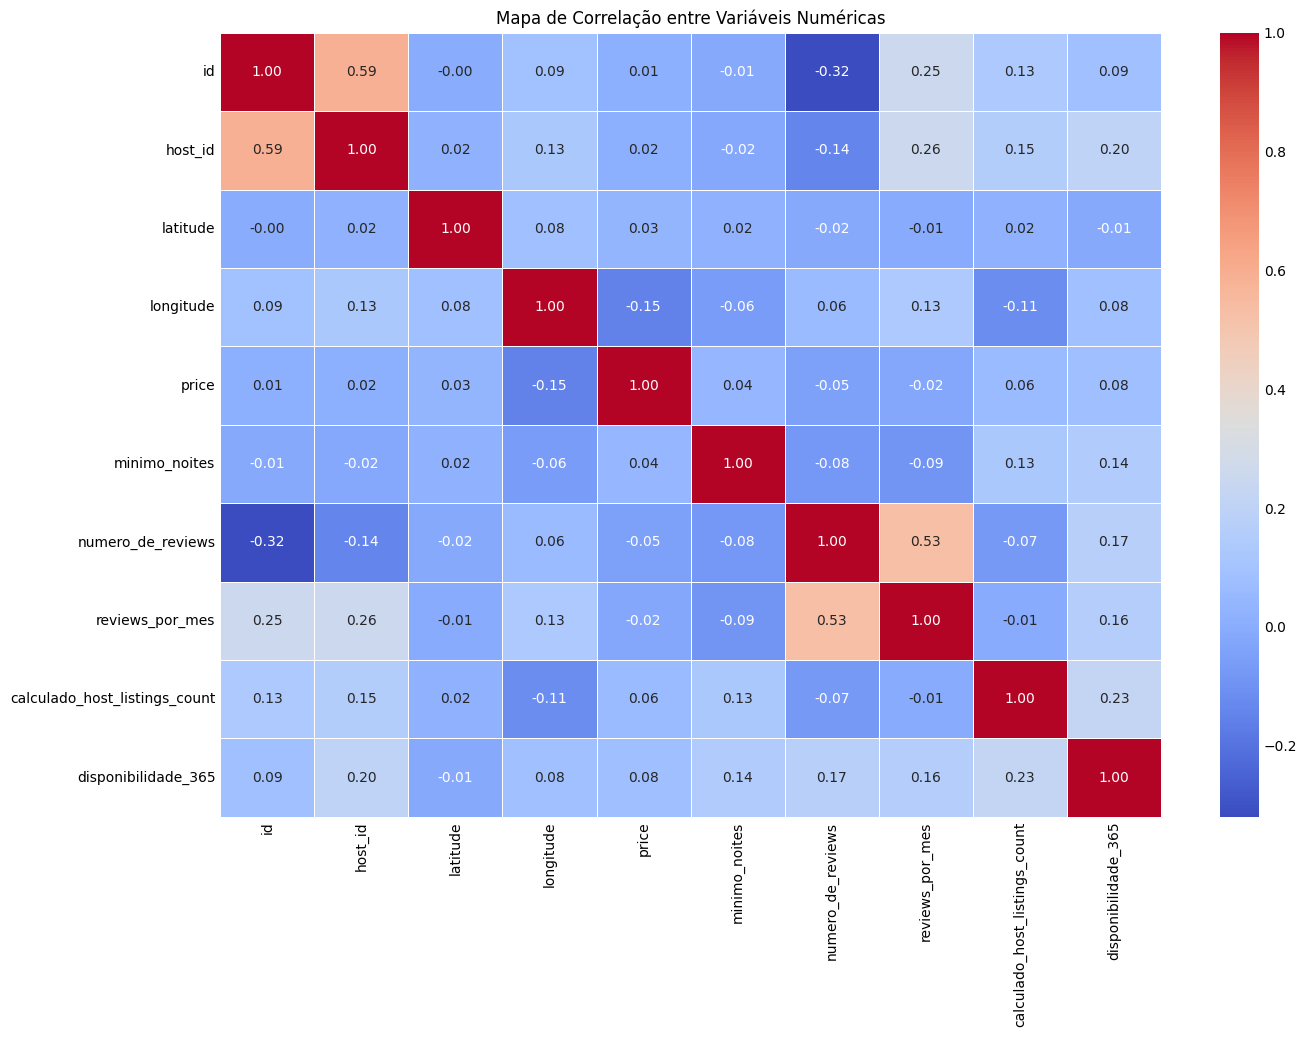

In [451]:
#Criando mapa de calor correlacionando com as variáveis númericas
db_numericas = db.select_dtypes(include=['number'])

correlacao = db_numericas.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()

Analisando a correlação das variáveis numéricas através do mapa de calor, podemos visualizar as relações dentro do conjunto de dados, identificando padrões, correlações e como essas variáveis interagem entre si.

# 2. Responda também às seguintes perguntas:


 ## **a.** Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

In [452]:
# Criando mapa de calor com as variáveis latitude, longitude e preço
mapa = folium.Map(location=[db['latitude'].mean(), db['longitude'].mean()], zoom_start=12)
heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in db.iterrows()]

HeatMap(heat_data).add_to(mapa)
mapa

O mapa de calor foi inserido com o objetivo de analisar os preços com maior ascensão e a alta demanda, além de visualizar as melhores regiões que podem ser um ponto forte para investimentos. Esse mapa ajuda a visualizar essas informações em combinação com os outros dados a seguir.

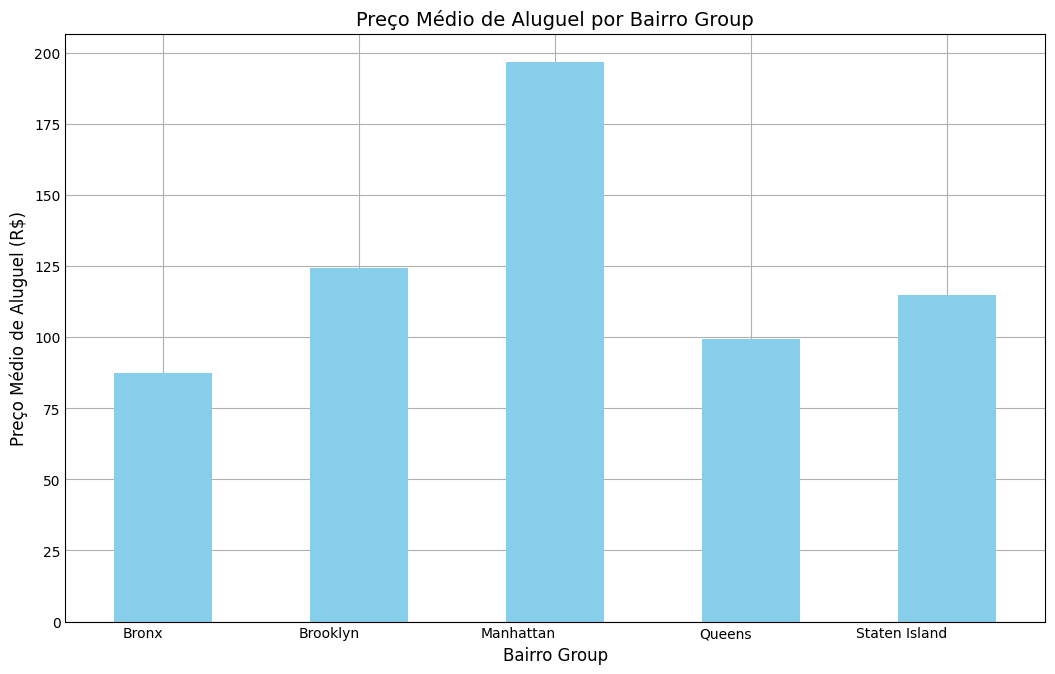

Média dos preços por bairro_group:
bairro_group
Bronx            87.50
Brooklyn        124.38
Manhattan       196.88
Queens           99.52
Staten Island   114.81
Name: price, dtype: float64

Mediana dos preços por bairro_group:
bairro_group
Bronx            65.00
Brooklyn         90.00
Manhattan       150.00
Queens           75.00
Staten Island    75.00
Name: price, dtype: float64

Moda dos preços por bairro_group:
bairro_group
Bronx             60
Brooklyn         100
Manhattan        150
Queens            50
Staten Island     75
Name: price, dtype: int64
Estatísticas de preço por bairro_group:
               min   mean    max
bairro_group                    
Bronx            0  87.50   2500
Brooklyn         0 124.38  10000
Manhattan        0 196.88  10000
Queens          10  99.52  10000
Staten Island   13 114.81   5000


In [466]:
# Gerando resumo estátisco para avaliar a correlação entre preços e grupo de bairros
preco_medio_por_bairro_group = db.groupby('bairro_group')['price'].mean()

plt.figure(figsize=(10, 6))
preco_medio_por_bairro_group.plot(kind='bar', color='skyblue')

plt.title('Preço Médio de Aluguel por Bairro Group', fontsize=14)
plt.xlabel('Bairro Group', fontsize=12)
plt.ylabel('Preço Médio de Aluguel (R$)', fontsize=12)
plt.xticks(rotation=360, ha='right')
mean_prices = db.groupby('bairro_group')['price'].mean()
median_prices = db.groupby('bairro_group')['price'].median()
mode_prices = db.groupby('bairro_group')['price'].apply(lambda x: x.mode()[0])
stats_por_bairro_group = db.groupby('bairro_group')['price'].agg(['min', 'mean', 'max'])


plt.show()
print("Média dos preços por bairro_group:")
print(mean_prices)

print("\nMediana dos preços por bairro_group:")
print(median_prices)

print("\nModa dos preços por bairro_group:")
print(mode_prices)
print("\nEstatísticas de preço por bairro_group:")
print(stats_por_bairro_group)

Analisando o gráfico e os dados abaixo sobre o preço médio e mediano, essas informações indicam uma tendência pelos preços por bairro. Podemos observar que Manhattan possui um preço médio de $196,88 e a mediana de $150. Isso pode predizer que existe a possibilidade de imóveis com preços muito altos além do valor médio, o que pode não representar o valor médio dos apartamentos no bairro. Já o grupo do bairro Bronx tem uma diferença de valor bem abaixo, com preço médio de $87,50 e média de $65, o que indica que a distribuição do preço é bem mais distribuído e equilibrado.

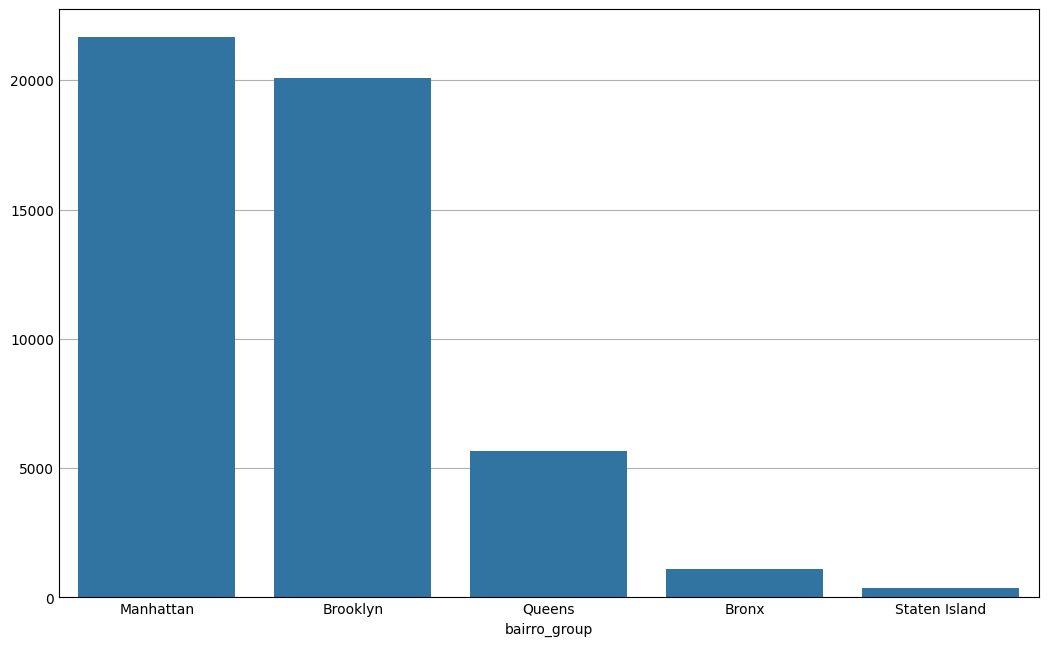

bairro_group
Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


In [454]:
# Criação do gráfico para visualização de quantidade de imóveis por grupo de bairro
db_bairro_group_counts = db['bairro_group'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=db_bairro_group_counts.index, y=db_bairro_group_counts.values)
plt.show()
print(db_bairro_group_counts)

Observando a quantidade de imóveis por grupo de bairros no gráfico o Manhattan possui o maior quantidade de imóveis totalizando 21.661 e Brooklyn com 20.103 um valor bem próximo a Manhatan tem tendência a ter uma alta demanda e um mercado mais ativo. Enquanto o Queens fica entre os outros bairros com um número intermediário 5.666. Ademais, Stan Island com apenas 373 e Bronx com 1091 tem um número bem menor comparado com os outros grupo de bairros. Podemos gerar uma análise que Manhattan e Brooklyn possui um valor maior e mais saturado em comparação com os outros bairros que possuem um valor menor de imóveis e também em relação aos preços mais acessíveis

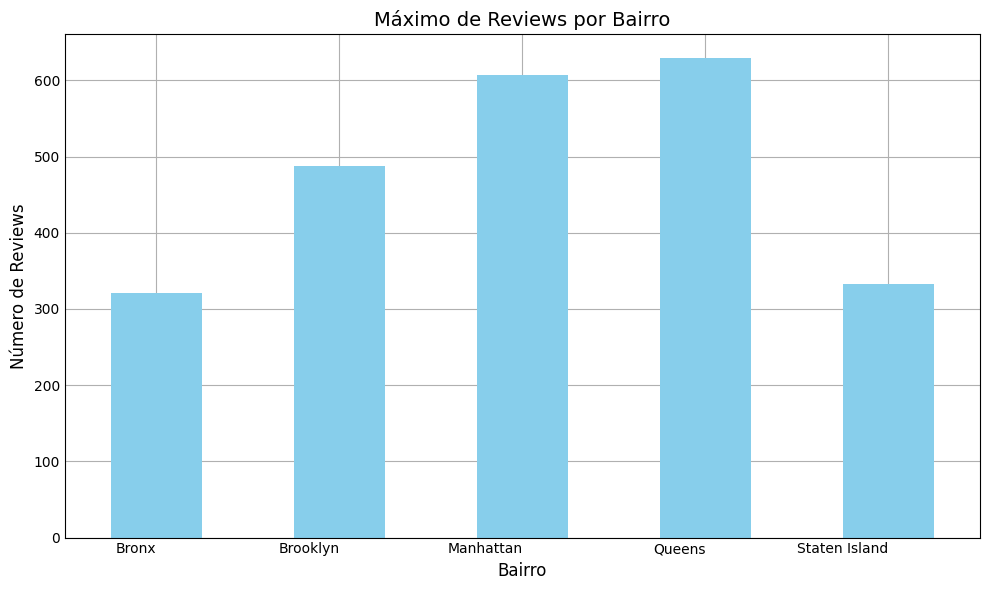

bairro_group
Bronx            321
Brooklyn         488
Manhattan        607
Queens           629
Staten Island    333
Name: numero_de_reviews, dtype: int64


In [455]:
# Visualização do número de reviews por grupo de bairro
db_grouped = db.groupby('bairro_group')['numero_de_reviews'].max()

plt.figure(figsize=(10, 6))
db_grouped.plot(kind='bar', color='skyblue')
plt.title('Máximo de Reviews por Bairro', fontsize=14)
plt.xlabel('Bairro', fontsize=12)
plt.ylabel('Número de Reviews', fontsize=12)
plt.xticks(rotation=360, ha='right')
plt.tight_layout()
plt.show()

db_grouped = db.groupby('bairro_group')['numero_de_reviews'].max()
print(db_grouped)

Com as informações no gráfico e na legenda abaixo podemos identificar que Queens e Manhattan possuem destaque por possuir maior número de reviews por bairro. A tendência é que os imóveis sejam de maior interesse dos usuários é um ótimo indicador e pode ser um bom motivo para interesses do mercado mobiliário por ser atrativo e dinâmico, por possuir uma boa quantidade de reviews. Os grupo de bairros de Bronx e Stante Island possuem uma menos reviews possuindo menos avaliações comparando a outros bairros possa ser que esses bairros possuam um nicho menor ou que gere menos interesse aos usuários.

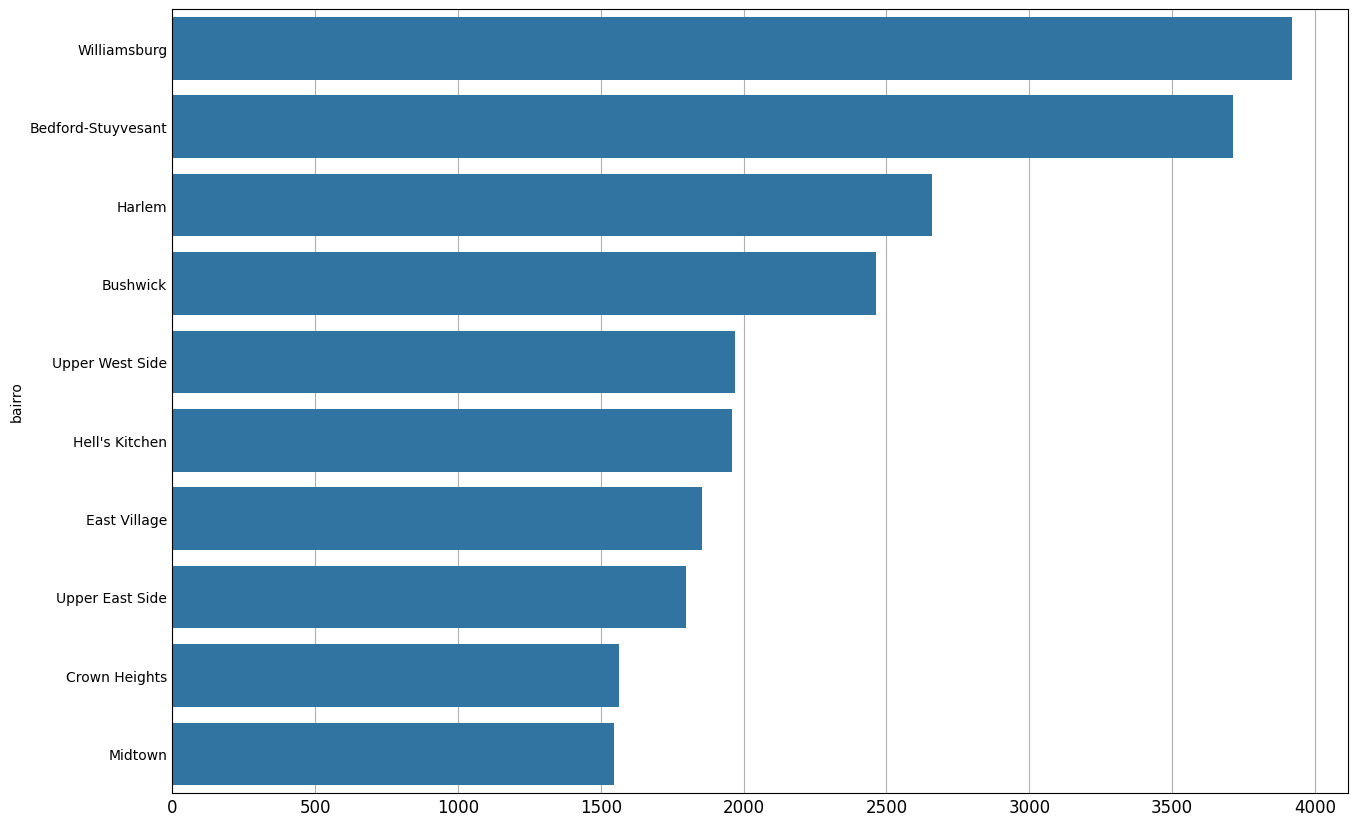

bairro
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64


In [456]:
# Visualizando os top 10 bairros
contagem_bairros = db['bairro'].value_counts()
top10_bairros = contagem_bairros.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=top10_bairros.index, x=top10_bairros.values)
plt.xticks(fontsize=12)
plt.show()

print(top10_bairros)

Com amostra dos dados, o bairro Williamsburg possui mais imóveis, e logo em seguida Bedford-Stuyvesant. Esses bairros possuem uma quantidade saturada de oferta de imóveis. Se o objetivo for ter dinamismo, é uma ótima opção; porém, o contra é que a concorrência é crescente pela demanda. Caso o objetivo seja uma baixa concorrência e um valor de custo-benefício mais acessível para os usuários, os bairros Crown Heights e Midtown se encaixam perfeitamente nessa finalidade. No entanto, se for seguir para um investimento mais estratégico e com pouca disputa no mercado, Midtown e Crown Heights podem ter uma vantagem maior.

In [457]:
print(f"Preço mediano por noite: ${db.price.mean():.2f}")
print(f"Preço máximo por noite:  ${db.price.max()}")
print(f"Preço minimo por noite:  ${db.price.min()}")

Preço mediano por noite: $152.72
Preço máximo por noite:  $10000
Preço minimo por noite:  $0


Diante dos preços exibidos por noite, o preço mínimo é 0, o que é bem atípico e pode indicar que existem imóveis com valor grátis, talvez cupons ou promoções que ofereçam estadia gratuita, ou também pode ser um dado exótico ou erro no cadastro dentro do sistema. Ademais, o preço mediano de 152,72 possui um bom custo-benefício, com imóveis acessíveis, enquanto o valor máximo por noite, chegando a $10.000, pode indicar imóveis de luxo.

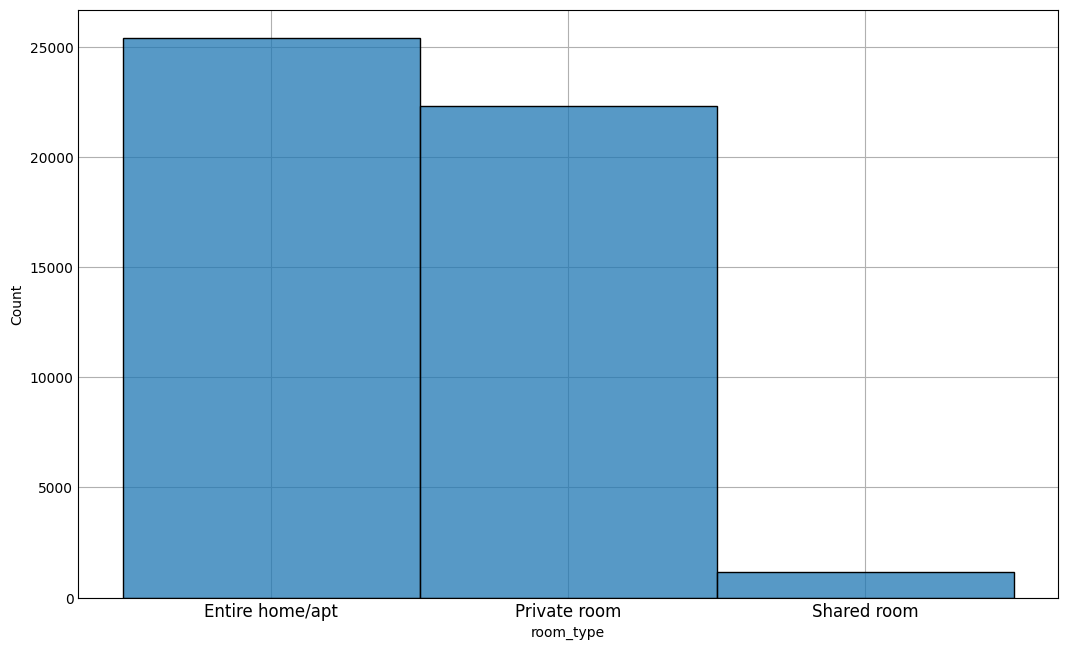

►  room_type
Entire home/apt    25409
Private room       22325
Shared room         1160
Name: count, dtype: int64


In [458]:
plt.figure(figsize=(10, 6))
sns.histplot(data=db, x='room_type')
plt.xticks(rotation=360, fontsize=12)
plt.show()

contagem_room_type = db['room_type'].value_counts()
print(f'► ', contagem_room_type)

As preferências dos hóspedes podem variar de acordo com o tipo de quarto. O que possuem maiores valores são casas e apartamentos, o que pode indicar maior preferência pelos usuários e uma demanda maior, enquanto os quartos compartilhados possuem valor bem abaixo em relação aos outros tipos.

In [459]:
media_disponibilidade_bairro = db.groupby('bairro_group')['disponibilidade_365'].mean()
print(media_disponibilidade_bairro)

bairro_group
Bronx           165.76
Brooklyn        100.22
Manhattan       111.98
Queens          144.45
Staten Island   199.68
Name: disponibilidade_365, dtype: float64


Os dados podem indicar que o grupo de bairro Queens possui uma disponibilidade intermediária, Manhattan e Brooklyn são muito requisitados, possuindo menos disponibilidade, enquanto Staten Island e Bronx têm maior disponibilidade, podendo ter ofertas mais constantes.

Concluindo, e com todas as informações apresentadas e de acordo com qual seja o objetivo das partes interessadas, o grupo de bairros Manhattan e Brooklyn, por ter uma alta demanda, tem grandes chances de possuir um retorno financeiro mais rápido, mesmo com os valores acima da média. Se a finalidade é um investimento intermediário entre custo e retorno, o Queens é uma boa opção. Uma opção mais acessível seria Staten Island e Bronx, que podem ser opções interessantes por terem um mercado menos concorrido e um valor de investimento menor.

## **b.** O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

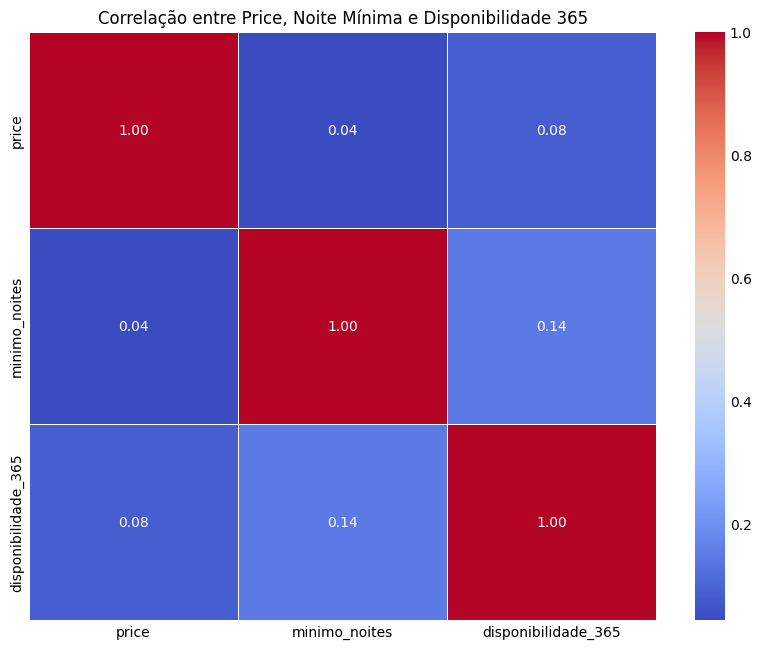

                     price  minimo_noites  disponibilidade_365
price                 1.00           0.04                 0.08
minimo_noites         0.04           1.00                 0.14
disponibilidade_365   0.08           0.14                 1.00


In [460]:
# Supondo que seu DataFrame seja chamado df e já esteja carregado
# Calcule a correlação entre as variáveis
correlation_matrix = db[['price', 'minimo_noites', 'disponibilidade_365']].corr()

# Crie o gráfico de calor (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlação entre Price, Noite Mínima e Disponibilidade 365')
plt.show()
print(correlation_matrix)

Com os dados extraídos, podemos analisar que a correlação entre Preço X Disponibilidade possuindo (0.08) e Preço X Noite Minimas (0.04) não interefem no valor por não ter uma influência significativa que possa impactar nessa variável por as correlações todas serem fracas.

## **c.** Existe algum padrão no texto do nome do local para lugares de mais alto valor?



<ipython-input-438-758f3157472d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequência', y='Palavra', data=df_frequencia.head(15), palette='magma')


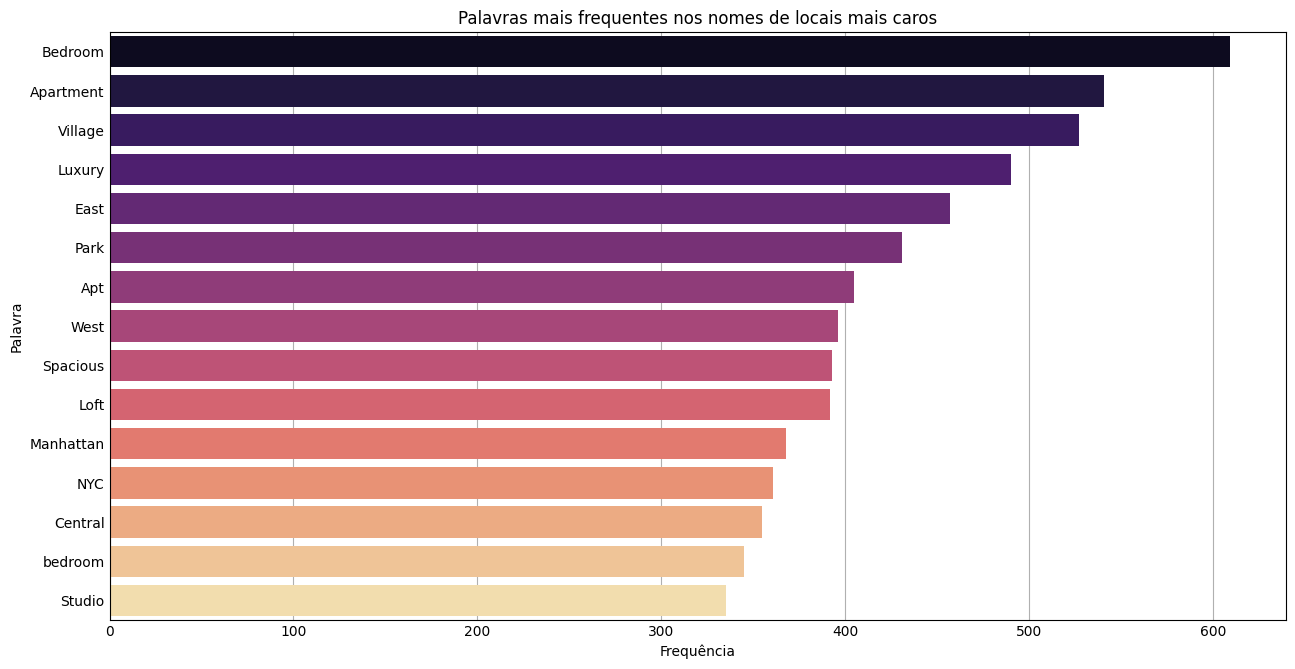

       Palavra  Frequência
47     Bedroom         609
15   Apartment         541
64     Village         527
97      Luxury         490
20        East         457
31        Park         431
71         Apt         405
63        West         396
5     Spacious         393
7         Loft         392
250  Manhattan         368
156        NYC         361
257    Central         355
17     bedroom         345
290     Studio         335


In [438]:
percentil_85 = db['price'].quantile(0.85)
lugares_caros = db[db['price'] >= percentil_85]['nome']
texto = " ".join(str(nome) for nome in lugares_caros.dropna())

palavras = texto.split()
contador_palavras = Counter(palavras)

df_frequencia = pd.DataFrame(contador_palavras.items(), columns=['Palavra', 'Frequência'])
df_frequencia = df_frequencia.sort_values(by='Frequência', ascending=False)

palavras_irrelevantes = {'de', 'do', 'da', 'em', 'com', 'para', 'no', 'na', 'and', 'the', 'in', 'of', '-', '&', 'w/','2','|','+','1', 'to', '1BR','3', 'with'}
df_frequencia = df_frequencia[~df_frequencia['Palavra'].isin(palavras_irrelevantes)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequência', y='Palavra', data=df_frequencia.head(15), palette='magma')
plt.title('Palavras mais frequentes nos nomes de locais mais caros')
plt.xlabel('Frequência')
plt.ylabel('Palavra')
plt.show()

print(df_frequencia.head(15))

Diante da análise, os imóveis que têm tendência a seguir um padrão de texto com atributos e particularidades associados a localidades geográficas privilegiadas de luxo. Sim existe um padrão que apresentam as palavras que têm associação com os 15% dos preços mais altos. As palavras com maior associação que são *East, West, Manhattan e Central,* sendo que esses indicadores de texto que apontam para os locais geográficos mais caros. O padrão por tipo de imóvel se configura com as palvaras *Bedroom, Apartment, Village e Luxury *

# **3.** Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê


No processo de análise exploratória dos dados, houve uma sequência de etapas de preparação para assegurar que os dados estivessem prontos para uma análise mais detalhada e, assim, para a construção de um modelo preditivo. Durante o processo, houve decisões sobre como lidar com os valores ausentes e sobre como transformar as variáveis da melhor maneira, para que fossem mais bem aproveitadas nas análises.

Em relação aos dados ausentes, especificamente na variável 'reviews_por_mes', a imputação foi feita pela média. Como é um dado contínuo, a média pode ser uma substituição razoável para a falta de informações. Já as variáveis 'nome' e 'host_name' tiveram seus valores ausentes preenchidos com o valor 'Desconhecido'. Essa escolha evitou problemas para a análise, preservando a integridade dos dados. Na coluna 'ultima_review', as avaliações que possuíam o valor zero foram preenchidas como 'Sem Avaliação', sendo consideradas, talvez, como imóveis novos que não possuíam avaliações ou que não haviam sido registrados pelo sistema. Além disso, a coluna foi convertida para o formato datetime.

As variáveis utilizadas foram 'bairro_group', 'bairro', 'latitude', 'longitude', 'room_type', 'Entire home/apt', 'minimo_noites', 'numero_de_reviews' e 'disponibilidade_365', que geraram resultados e foram usadas para a análise da nossa tarefa de negócio.

O tipo de problema que estamos trabalhando é do tipo regressão, pois precisamos prever um valor numérico específico, que, no nosso caso, seria o valor do aluguel de imóveis temporários.

O modelo escolhido foi o Random Forest. O lado positivo de utilizar esse modelo é que ele é eficaz em muitos tipos de dados, podendo trabalhar com relações mais complexas entre as variáveis. Além disso, ele informa quais variáveis têm maior influência na previsão do valor. O lado negativo desse modelo é que ele requer um custo computacional alto e tempo para treinamento, devido à construção de um grande número de árvores.

# **4.** Supondo um apartamento com as seguintes características:

{'id': 2595,

 'nome': 'Skylit Midtown Castle',

 'host_id': 2845,

 'host_name': 'Jennifer',

 'bairro_group': 'Manhattan',

 'bairro': 'Midtown',

 'latitude': 40.75362,

 'longitude': -73.98377,

 'room_type': 'Entire home/apt',

 'minimo_noites': 1,

 'numero_de_reviews': 45,

 'ultima_review': '2019-05-21',

 'reviews_por_mes': 0.38,

 'calculado_host_listings_count': 2,

 'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?


In [463]:
db['ultima_review'] = pd.to_datetime(db['ultima_review'])

X = db[['bairro_group', 'bairro', 'latitude', 'longitude', 'room_type', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']]
y = db['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_columns = ['bairro_group', 'bairro', 'room_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', SimpleImputer(strategy='mean'), ['latitude', 'longitude', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365'])
    ])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

apartment_data = {
    'bairro_group': ['Manhattan'],
    'bairro': ['Midtown'],
    'latitude': [40.75362],
    'longitude': [-73.98377],
    'room_type': ['Entire home/apt'],
    'minimo_noites': [1],
    'numero_de_reviews': [45],
    'reviews_por_mes': [0.38],
    'calculado_host_listings_count': [2],
    'disponibilidade_365': [355]
}


apartment_df = pd.DataFrame(apartment_data)
predicted_price = model.predict(apartment_df)
print(f'Preço previsto para o apartamento {apartment_df["bairro_group"][0]} - {apartment_df["bairro"][0]}: ${predicted_price[0]:.2f}')


Preço previsto para o apartamento Manhattan - Midtown: R$311.07


Diante do resultado apresentado, a previsão feita pelo modelo escolhido, Random Forest, demorou um bom tempo para treinar os dados, o que é um ponto negativo, além de ter um custo computacional alto. No entanto, a previsão indica ser razoável, pois está dentro dos limites da base de dados. O valor previsto foi \$311,07, acima da média dos preços do bairro de Manhattan, que é \$196,88, conforme os dados anteriores. O valor máximo registrado no bairro chega a \$10.000. No entanto, alguns fatores levam em consideração a localização e suas características. Isso pode indicar que o imóvel não é de luxo extremo, mas sim uma acomodação bem avaliada e bem localizada. Contudo iremos verificar o desempenho do nosso modelo.

In [468]:
# Realizando previsões no conjunto de teste para verificar a acurácia do nosso modelo
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')



MSE: 55035.38
RMSE: 234.60
MAE: 66.36
R²: -0.10


O modelo de regrssão utilizado não teve um bom desempenho sendo insatisfatório, com um R^2 (-10) o que pode ser que ele não está conseguindo coletar a variabilidade dos preços corretamente. O MSE e RMSE muito altos, indicando erros consideráveis nas previsões. O MAE indica que esse modelo não é preciso suficiente, com erro médio de \$66,36. Diante do trabalho para possuir um modelo eficiente ao problema é necessário identificar o erro e procurar melhorias que podem ser veitas nas variáveis, ajustes de hiperparâmetros ou mesmo o teste de outros modelos.

Depois de muitos dias e noites e tempo treinando neurônios e ajustando hiperparâmetros, finalmente concluo esse desafio! Foi uma jornada cheia de overfitting emocional (😜). Consegui chegar ao fim. Obrigada por me acompanhar nesse desafio, e que a floresta de probabilidades nos reúna novamente em breve! 🌲💡
<div align="right"><img src="https://media2.giphy.com/media/Qp8JVw4n37No6spF3s/giphy.webp?cid=790b7611z77p0qsrdhqqr2eerqiy49mlu31i3q3l4d9hzj8n&ep=v1_stickers_search&rid=giphy.webp&ct=s" width="150">
</div>

